# **importing dependencies**

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


importing dataset with csv file (Encoding the CSV in base64 to make it accesable)


In [147]:
import base64

with open('Chocolate Sales (2).csv', 'rb') as f:
    csv_bytes = f.read()

csv_base64 = base64.b64encode(csv_bytes).decode('utf-8')


In [148]:
import pandas as pd
from io import BytesIO
import base64

# Decode the CSV from base64
csv_bytes = base64.b64decode(csv_base64)

# Read it into pandas
df = pd.read_csv(BytesIO(csv_bytes))

df.head()


,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04/01/2022,"$5,320.00",180
1,Van Tuxwell,India,85% Dark Bars,01/08/2022,"$7,896.00",94
2,Gigi Bohling,India,Peanut Butter Cubes,07/07/2022,"$4,501.00",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27/04/2022,"$12,726.00",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24/02/2022,"$13,685.00",184


CHECK DATA

In [149]:
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3282 entries, 0 to 3281
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   3282 non-null   object
 1   Country        3282 non-null   object
 2   Product        3282 non-null   object
 3   Date           3282 non-null   object
 4   Amount         3282 non-null   object
 5   Boxes Shipped  3282 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 154.0+ KB


In [150]:
df['Amount'] = (
    df['Amount']
    .str.replace('$', '', regex=False)
    .str.replace(',', '', regex=False)
    .astype(float)
)


DATA CLEANING NEEDED SINCE IN THE DATASET

*   amount is string
*   raw dates



In [151]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

df.drop('Date', axis=1, inplace=True)


In [152]:
df.isnull().sum()


,0
Sales Person,0
Country,0
Product,0
Amount,0
Boxes Shipped,0
Day,0
Month,0
Year,0


#Encode Categorical Columns

In [153]:
df_encoded = pd.get_dummies(
    df,
    columns=['Sales Person', 'Country', 'Product'],
    drop_first=True
)




# Define Features (X) and Target (y)

In [154]:
X = data_encoded.drop("Amount", axis=1)
y = data_encoded["Amount"]


In [160]:
print(data_encoded.shape)
print(data_encoded.columns)


(3282, 555)
Index(['Amount', 'Boxes Shipped', 'Sales Person_Barr Faughny',
       'Sales Person_Beverie Moffet', 'Sales Person_Brien Boise',
       'Sales Person_Camilla Castle', 'Sales Person_Ches Bonnell',
       'Sales Person_Curtice Advani', 'Sales Person_Dennison Crosswaite',
       'Sales Person_Dotty Strutley',
       ...
       'Date_31/01/2024', 'Date_31/03/2022', 'Date_31/03/2023',
       'Date_31/03/2024', 'Date_31/05/2022', 'Date_31/05/2023',
       'Date_31/05/2024', 'Date_31/08/2022', 'Date_31/08/2023',
       'Date_31/08/2024'],
      dtype='object', length=555)


# Train–Test Split

In [155]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


#Scaling

In [156]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Train Random Forest Regression Model

In [157]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)


Predict

In [158]:
rf_pred = rf.predict(X_test)



#This is the OUTPUT for chocolate sales

In [159]:
print("MAE:", mean_absolute_error(y_test, rf_pred))
print("MSE:", mean_squared_error(y_test, rf_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, rf_pred)))
print("Random Forest R2:", r2_score(y_test, rf_pred))


MAE: 2344.2551267884323
MSE: 10647678.326702187
RMSE: 3263.078044837755
Random Forest R2: 0.36727010353415723


# Actual vs Predicted Sales Amount

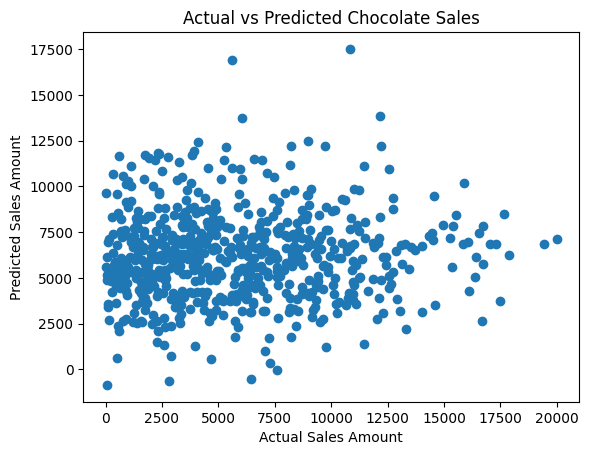

In [161]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales Amount")
plt.ylabel("Predicted Sales Amount")
plt.title("Actual vs Predicted Chocolate Sales")
plt.show()


# Distribution of Sales Amount

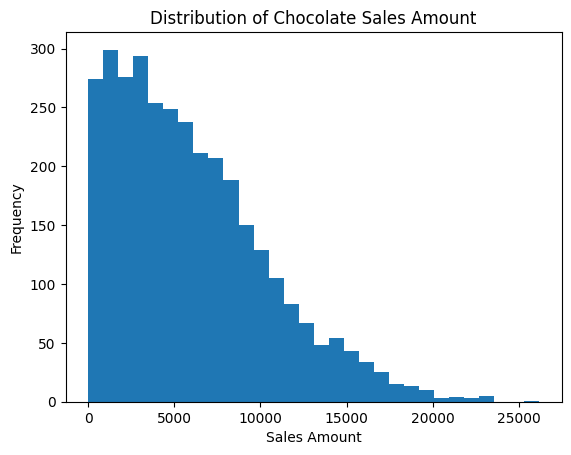

In [162]:
plt.figure()
plt.hist(data["Amount"], bins=30)
plt.xlabel("Sales Amount")
plt.ylabel("Frequency")
plt.title("Distribution of Chocolate Sales Amount")
plt.show()
